In [1]:
# import packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import json

# Plot config
plt.style.use("classic")
plt.rc("figure", facecolor="white", dpi = 300)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

In [2]:
kekulene_data = None
with open('../kekulene.json', 'r') as file:
    kekulene_data = json.load(file)

def get_position(atom_data):
    return atom_data['position']

def get_bonds(atom_data):
    neibs_data = [ kekulene_data['carbon_atoms' if typ == 0 else 'hydrogen_atoms'][str(n)] for (n, typ) in zip(atom_data['neighbors'], atom_data['type']) ]
    return [ list(zip(neib['position'], get_position(atom_data))) for neib in neibs_data ]
    


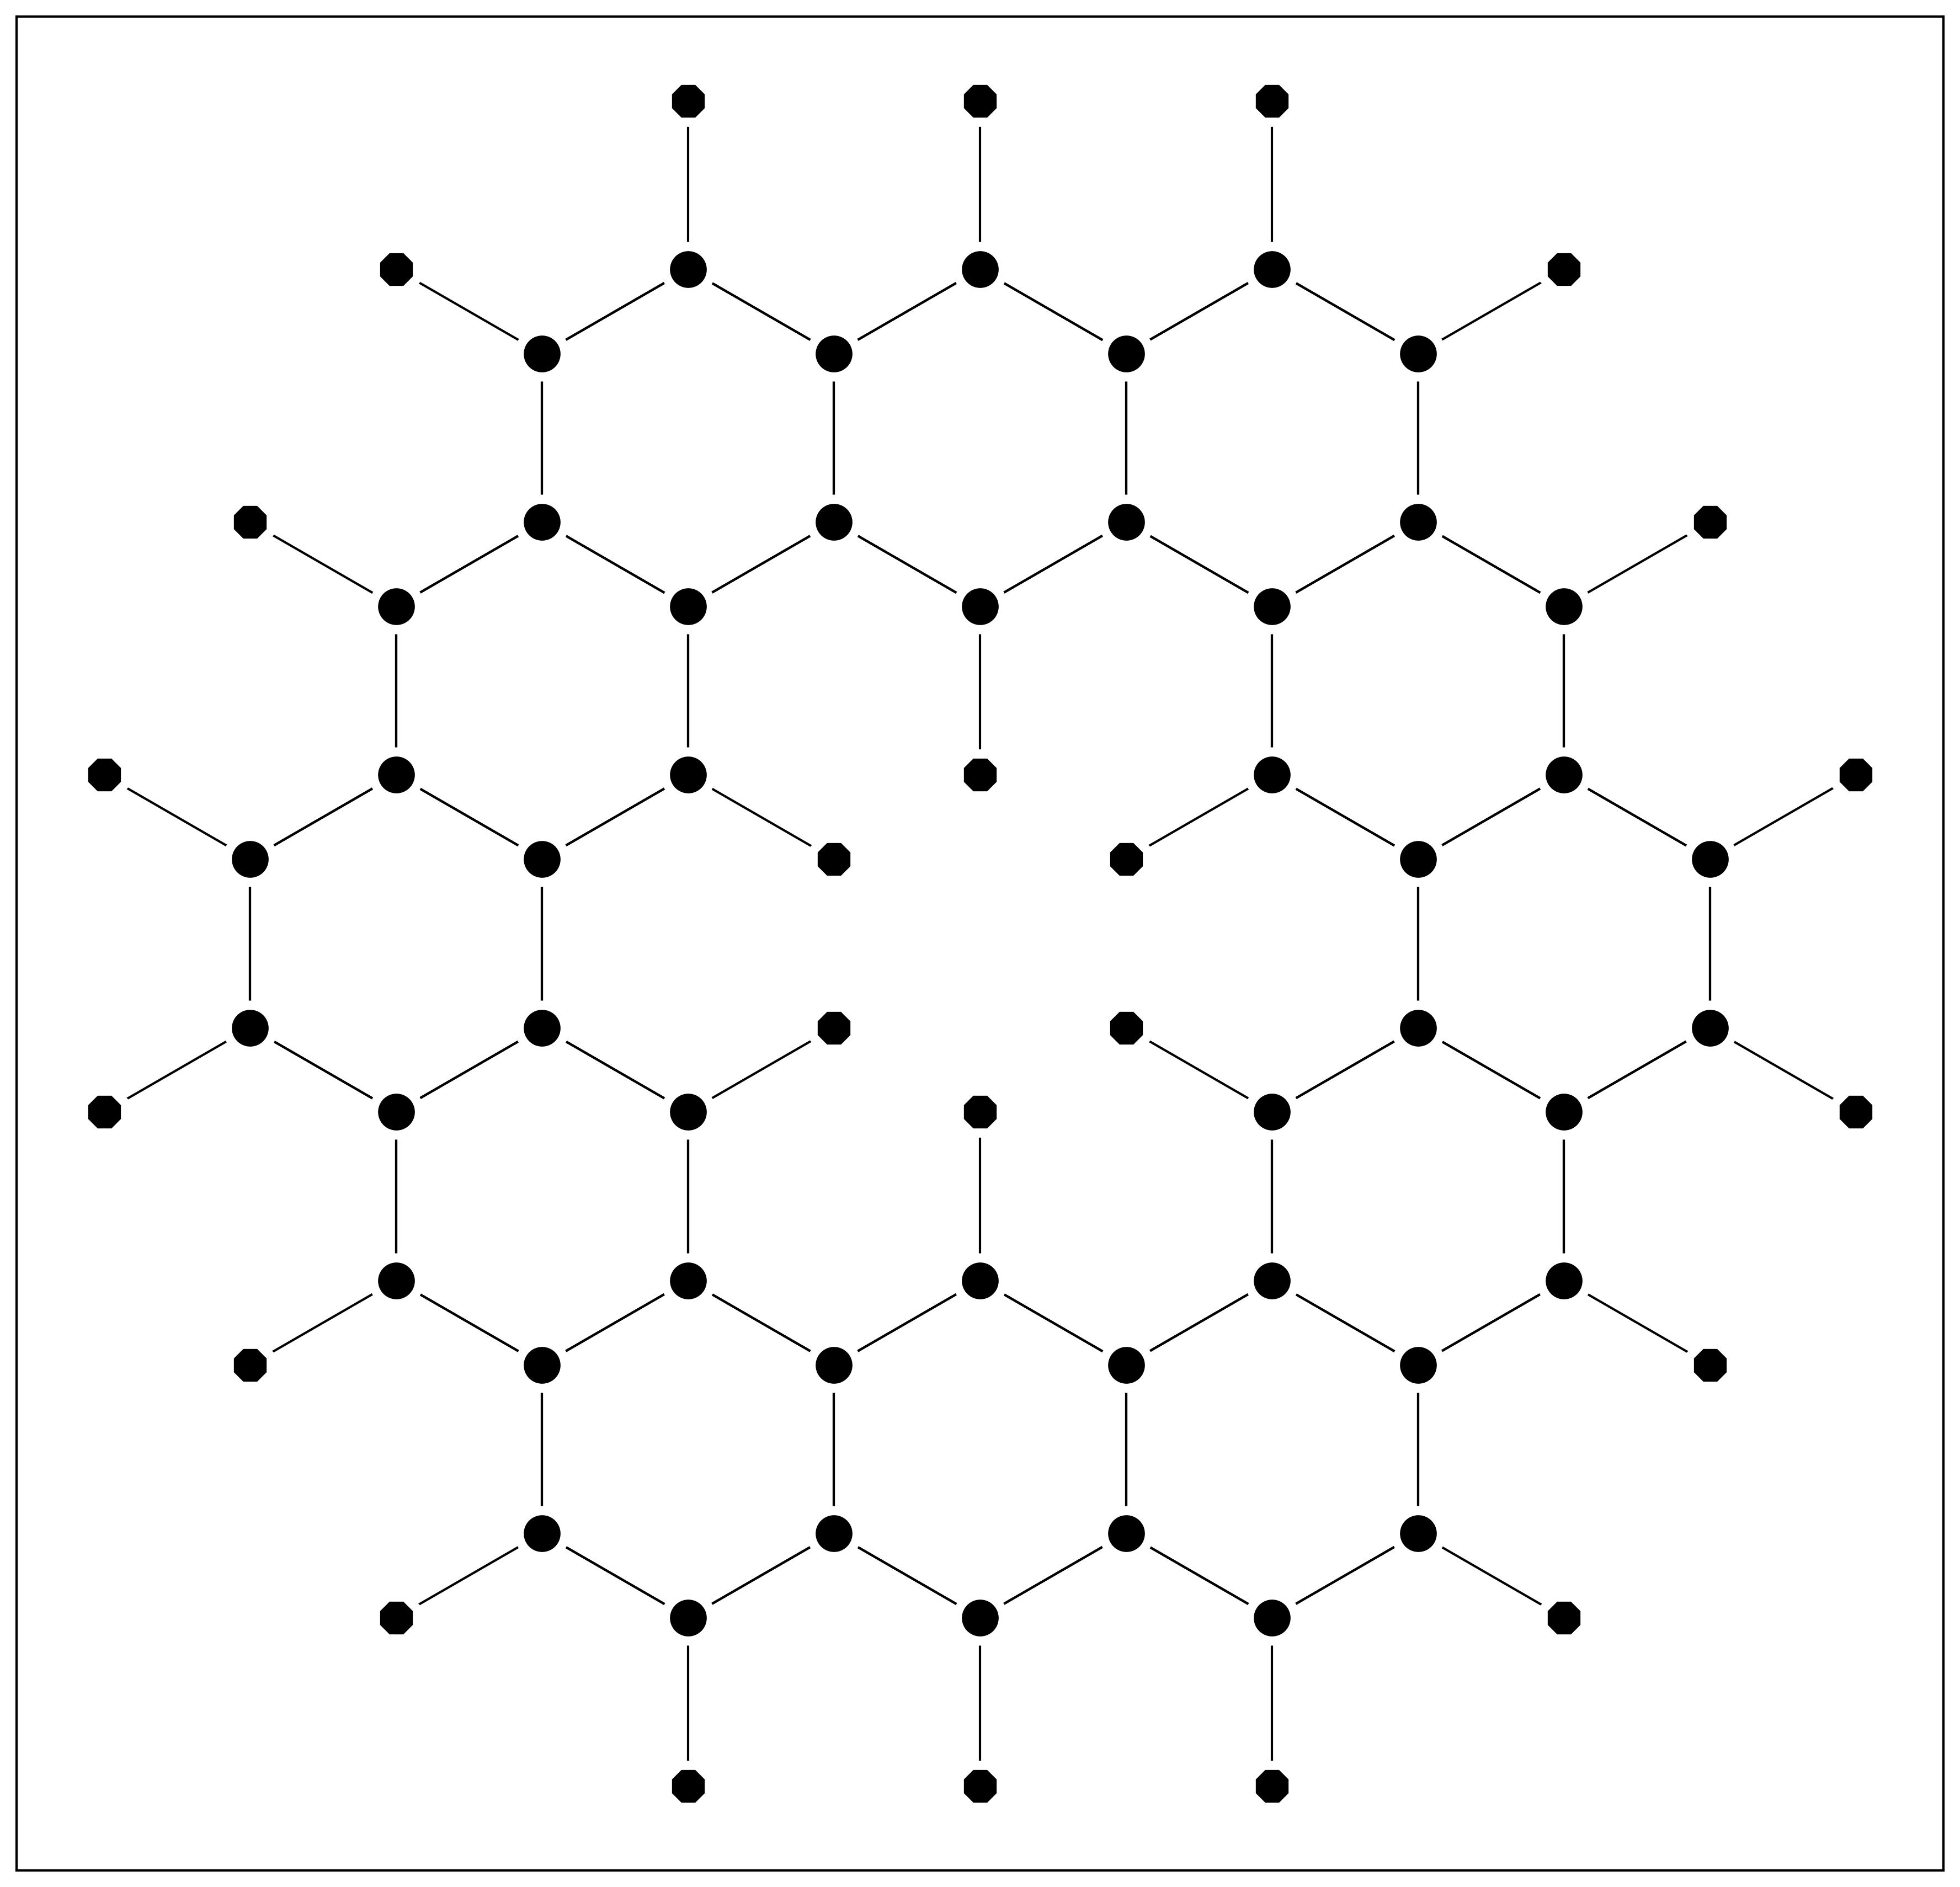

In [91]:
# Create figure
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(111, aspect = 'equal')

# Load data
cx, cy = zip(*map(get_position, kekulene_data['carbon_atoms'].values()))
hx, hy = zip(*map(get_position, kekulene_data['hydrogen_atoms'].values()))

# Plot data
for c_atom in kekulene_data['carbon_atoms'].values(): 
    for bond in get_bonds(c_atom):
        ax.plot(*bond, 'k-')

markers = ['o', '8']
ax.plot(cx, cy, 'k'+ markers[0], ms = 20, mec = '1.0', mew = 4)
ax.plot(hx, hy, 'k'+ markers[1], ms = 20, mec = '1.0', mew = 4)

# Plot size
border = 0.05
xsize = max(hx) - min(hx)
ysize = max(hy) - min(hy)
ax.set_xlim([-border*xsize, (1 + border)*xsize])
ax.set_ylim([-border*ysize, (1 + border)*ysize])

# Plot ticks
ax.set_xticks([])
ax.set_yticks([])

ax.set_aspect('equal')
fig.tight_layout()

# save
fig.savefig(f"plots/schematic/kekulene ({markers[0]} {markers[1]}).png")
fig.savefig(f"plots/schematic/kekulene ({markers[0]} {markers[1]}).pdf")

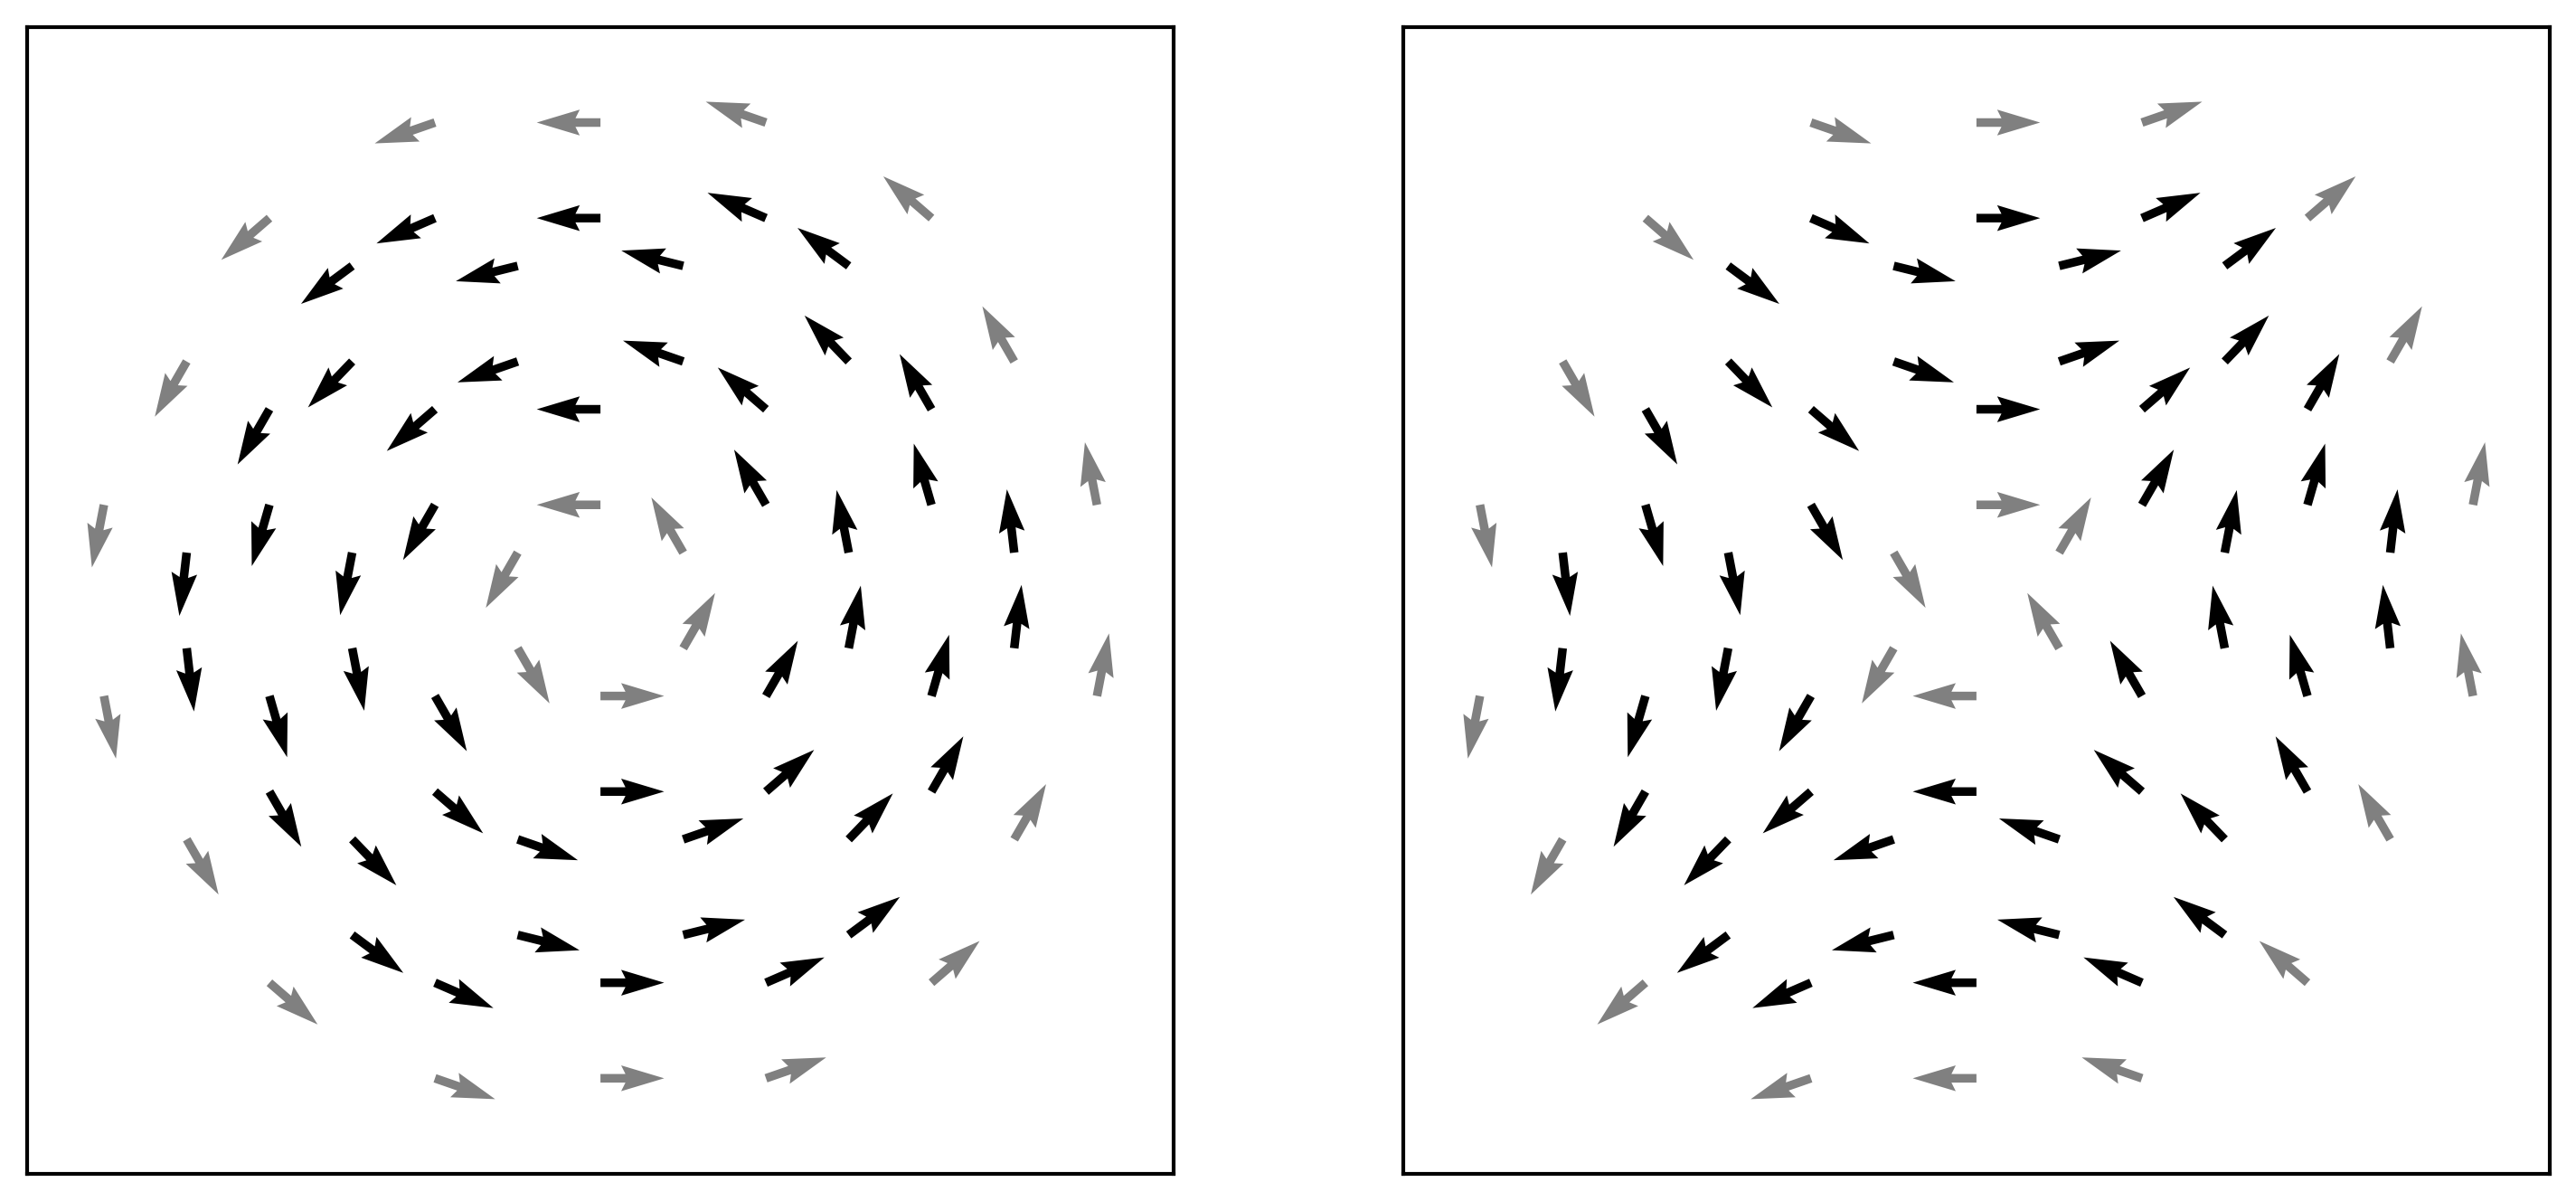

In [66]:
def get_vortex(parity = 1):
    cx, cy = zip(*map(get_position, kekulene_data['carbon_atoms'].values()))
    hx, hy = zip(*map(get_position, kekulene_data['hydrogen_atoms'].values()))
    
    center_x = np.mean(cx)
    center_y = np.mean(cy)
    
    ca =  [ np.arctan2(y - center_y, x - center_x) for x,y in zip(cx, cy) ]
    ha =  [ np.arctan2(y - center_y, x - center_x) for x,y in zip(hx, hy) ]
    
    u = np.array([ np.sin(-ang * parity) for ang in ca ] + [ np.sin(-ang * parity) for ang in ha ])
    v = np.array([ np.cos(ang) for ang in ca ] + [ np.cos(ang) for ang in ha ])
    
    x = np.array(cx + hx) - center_x
    y = np.array(cy + hy) - center_y
    
    return x, y, u, v
    
fig = plt.figure(figsize = (12, 6))
axs = fig.subplots(1, 2)

vortex = get_vortex(1)
anti_vortex = get_vortex(parity = -1)

for (data, ax) in zip([vortex, anti_vortex], axs):
    data_points = list(zip(*data))
    carb, hyd = list(zip(*data_points[:48])), list(zip(*data_points[48:]))
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim([-6, 6])
    ax.set_ylim([-6, 6])
    
    ax.quiver(*hyd, color = 'grey')
    ax.quiver(*carb)
    
    #ax.plot(*carb[:2], 'o', color = 'black', mec = 'w')
    #ax.plot(*hyd[:2], 'D', color = 'grey', mec = 'w')
    
    ax.set_aspect('equal')

fig.savefig(f"plots/schematic/analitical.png")
fig.savefig(f"plots/schematic/analitical.pdf")